## Multi-class classification

In this notebook we will use **sklearn** and also implement by hand **softmax regression** in context of Logistic regression to fit multiple classes. 

Let $X$ be the feature matrix of dimensions $N$ (number of samples) * $M$ (number of features). $y$ be the target variable which takes values from a class $\mathcal{C}$, $y \in \mathcal{C}$. The Loss function of **softmax regression** is defined as:

$y$ is generally converted to **one-hot-representation**.

$L=-\frac{1}{N}\sum_{i=0}^{N}\sum_{j \in \mathcal{C}} y^{(i)}_{j}\text{log}(\hat{y^{(i)}_{j}})$.

Where $\hat{y^{(i)}_{j}} = \frac{e^{z^{(i)}_j}}{\sum_{k \in \mathcal{C}} e^{z^{(i)}_k}}$. 

And $z^{(i)}_j = x^{(i)T}\beta_j$, $\beta_j$ are coefficients for class $j$.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Plot decision regions - From Python Machine Leaning - Sebastian Raschka & Vahid Mirjalili
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [3]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only two features
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_test: [15 15 15]
Labels counts in y_train: [35 35 35]


In [4]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Coeff =  [[-15.08348975 -10.53030043]
 [  2.44273659  -2.10663158]
 [ 14.74400272   6.81638816]] Intercept =  [-16.32483838  -0.75892486 -13.43660084]


<ipython-input-2-cce3ab4f0704>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-5-09682e716855>:15: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


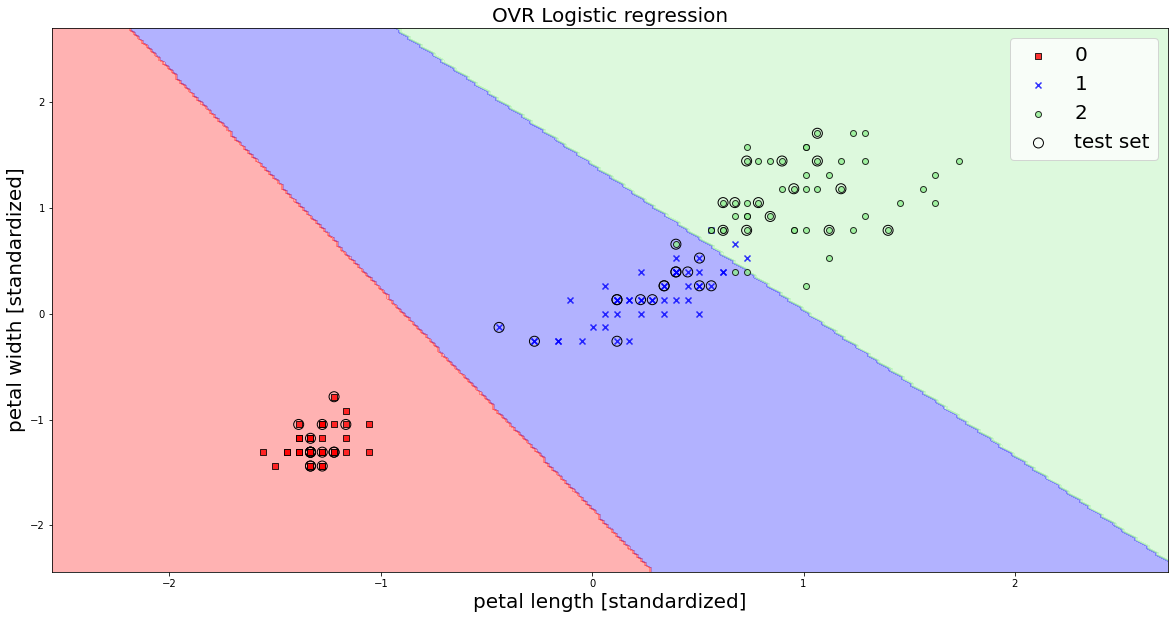

In [5]:
#Lets apply ovr logistics regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none', random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred_train = lr.predict(X_train_std)
y_pred_test = lr.predict(X_test_std)
print("Coeff = ", lr.coef_, "Intercept = ", lr.intercept_)

#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('OVR Logistic regression', fontsize=20)

#Confusion matrix
from sklearn.metrics import confusion_matrix
ovr_confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
ovr_confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

Coef =  [[-17.48033743 -13.45032592]
 [  1.36804621   3.31687397]
 [ 16.11229121  10.13345195]] Intercept =  [-10.87244802  12.15465675  -1.28220873]


<ipython-input-2-cce3ab4f0704>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-6-0f7eff569903>:15: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


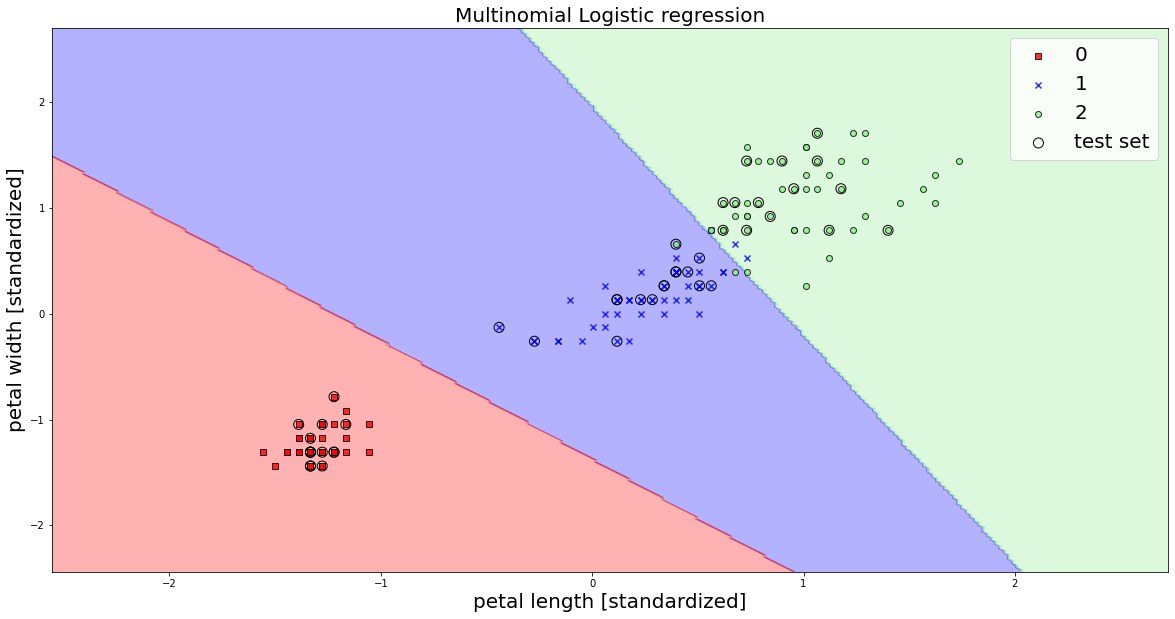

In [6]:
#Lets apply Multinomial (softmax) logistics regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none', random_state=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_std, y_train)
y_pred_train = lr.predict(X_train_std)
y_pred_test = lr.predict(X_test_std)
print("Coef = ", lr.coef_, "Intercept = ", lr.intercept_)

#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('Multinomial Logistic regression', fontsize=20)

#Confusion matrix
from sklearn.metrics import confusion_matrix
multinomial_confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
multinomial_confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

In [7]:
print("OVR confusion_matrix train:\n", ovr_confusion_matrix_train)
print("OVR confusion_matrix test:\n", ovr_confusion_matrix_test)
print("Multinomial confusion_matrix train:\n", multinomial_confusion_matrix_train)
print("Multinomial confusion_matrix test:\n", multinomial_confusion_matrix_test)

OVR confusion_matrix train:
 [[35  0  0]
 [ 0 32  3]
 [ 0  2 33]]
OVR confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Multinomial confusion_matrix train:
 [[35  0  0]
 [ 0 32  3]
 [ 0  1 34]]
Multinomial confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


we can see that multinomial has less error in the training set.

### Implementation of softmax Logistic regression
In the section below we will implement multiclass sofmax logistic regression.

In [8]:
#Multi class logistic regression
class MultiClassLogisticRegression():
    """
       Implements multiclass logistic regression
    """
    def __init__(self, learning_rate=0.1, nEpoch=100):
        """
            learning_rate: learning rate of Stochastic Graident Decsent
            nEpoch: Number of epochs of Stochastic gradient descent
        """
        self.learning_rate = learning_rate
        self.nEpoch = nEpoch
    
    def fit(self,X,y):
        np.random.seed(0)
        """
        X is N*M (N number of samples, M number of features)
        y is N*1 (N number of samples)
        """
        #Lets convert y to one hot encoded y 
        from sklearn.preprocessing import OneHotEncoder
        enc = OneHotEncoder()
        y_one_hot = enc.fit_transform(y.reshape(y.shape[0],1)).toarray()
        print("Shape of y_one_hot = ", y_one_hot.shape, " N ( number of samples ) * C ( number of classes ) ")
        
        #Add a one column to X
        x_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
        print("Shape of x_w_ones = ", x_w_ones.shape, " N (number of samples ) * M+1 ( number of features + 1)")
        
        #initialize betas
        self.beta_ = np.random.randn(x_w_ones.shape[1], y_one_hot.shape[1])
        print("Shape of beta = ", self.beta_.shape, " M+1 (number of features+1) * C ( number of classes ) ")
        
        self.losses_ = []
        for e in range(self.nEpoch):
            p = np.random.permutation(x_w_ones.shape[0])
            x_w_ones = x_w_ones[p]
            y_one_hot = y_one_hot[p]
            for xi, yi in zip(x_w_ones, y_one_hot):
                #Calculate loss
                self.losses_.append(self._loss(x_w_ones, y_one_hot))
                #Calculate gradients
                xi = xi.reshape(xi.shape[0],1)
                yi = yi.reshape(yi.shape[0],1)
                grad = self._gradient(xi, yi)
                self.beta_ -= self.learning_rate * grad
            
    def _loss(self, X, y):
        """Computes the loss function
           given X, y
        """
        y_prob_pred = self.predict_prob(X)
        l = np.multiply(y, np.log(y_prob_pred))
        return -(np.sum(l)/X.shape[0])

    def _gradient(self, X, y):
        yp = self.predict_prob(X.T)
        a = np.matmul(np.ones(shape=(y.shape[0],1)),yp)-np.eye(y.shape[0])
        b = np.matmul(y.T,a)
        grad = np.matmul(X,b)
        return grad
            
    def predict_prob(self, X):
        z = np.matmul(X, self.beta_)
        z = np.exp(z)
        zsum = np.sum(z,axis=1, keepdims=True)
        return (z / zsum)
    
    def predict(self, X):
        x_w_ones = np.hstack((np.ones(shape=(X.shape[0],1)),X))
        yhat = self.predict_prob(x_w_ones)
        return np.argmax(yhat, axis=1)
        

Shape of y_one_hot =  (105, 3)  N ( number of samples ) * C ( number of classes ) 
Shape of x_w_ones =  (105, 3)  N (number of samples ) * M+1 ( number of features + 1)
Shape of beta =  (3, 3)  M+1 (number of features+1) * C ( number of classes ) 


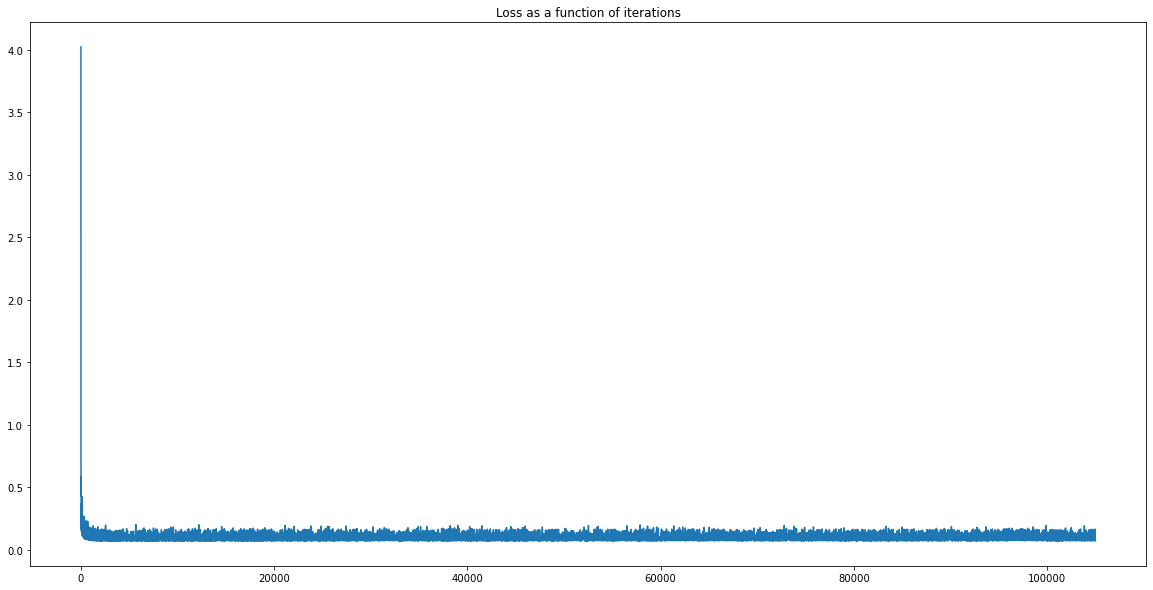

In [9]:
mlr = MultiClassLogisticRegression(learning_rate=1,nEpoch=1000)
mlr.fit(X_train_std,y_train)
plt.figure(figsize=(20,10))
plt.plot(mlr.losses_)
plt.title('Loss as a function of iterations')

y_pred_train = mlr.predict(X_train_std)
y_pred_test = mlr.predict(X_test_std)

In [50]:
from sklearn.metrics import confusion_matrix
multinomial_confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
multinomial_confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

In [10]:
print("Multinomial confusion_matrix train:\n", multinomial_confusion_matrix_train)
print("Multinomial confusion_matrix test:\n", multinomial_confusion_matrix_test)

Multinomial confusion_matrix train:
 [[35  0  0]
 [ 0 32  3]
 [ 0  1 34]]
Multinomial confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


<ipython-input-2-cce3ab4f0704>:37: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-11-9f8c7a855aa9>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'Multinomial Logistic regression')

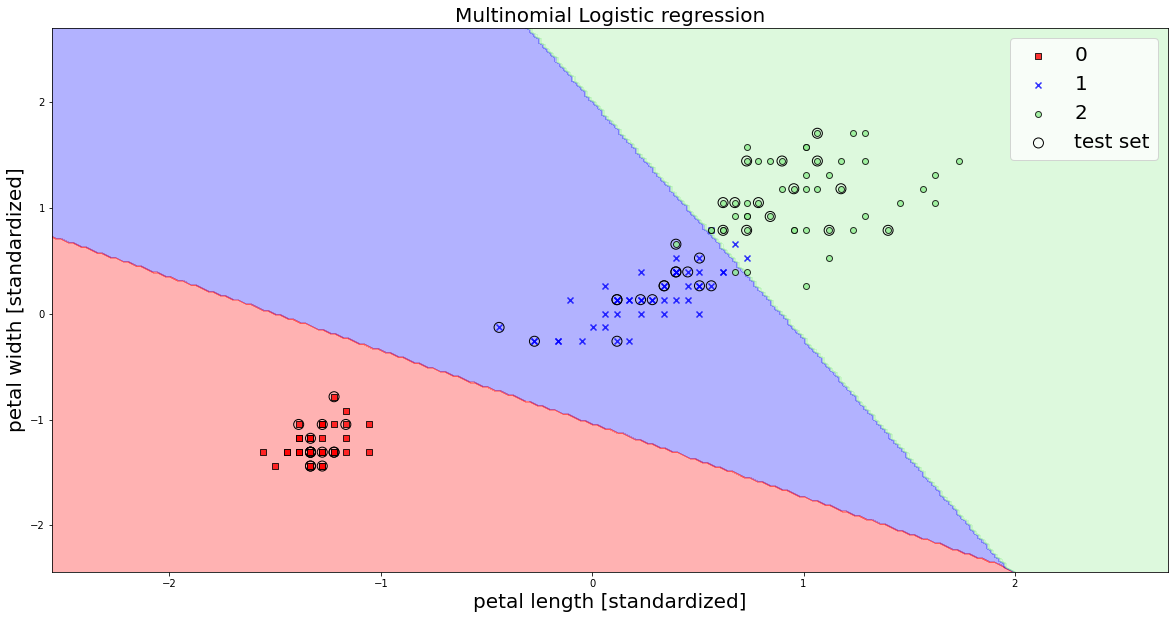

In [11]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=mlr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('Multinomial Logistic regression', fontsize=20)

You can see the decision boundaries above. Decision boundary between red and blue is not exactly same as sklearn because there are not many points in between the classes. Its well known that when classes are well separated **Logistic Regression** can be unstable, in the above example red and blue class is well separated hence our decision boundaries are slightly different.